In [113]:
# TODO:
# max filter
# min filter
# median filter
# weighted median filter

# derivative filter
# prewitt filter
# sobel filter

In [114]:
import numpy as np
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [115]:
def max_filtered(img, kernel_size):
    """
    max filter
    """
    img = img.copy()
    h, w= img.shape
    pad = kernel_size // 2
    img_pad = np.pad(img, pad, mode='constant', constant_values=0)
    img_max = np.zeros((h, w), dtype=np.uint8)
    for i in tqdm(range(h)):
        for j in range(w):
            img_max[i, j] = np.max(img_pad[i:i+kernel_size, j:j+kernel_size])
    return img_max

def min_filtered(img, kernel_size):
    """
    min filter
    """
    img = img.copy()
    h, w= img.shape
    pad = kernel_size // 2
    img_pad = np.pad(img, pad, mode='constant', constant_values=255)
    img_min = np.zeros((h, w), dtype=np.uint8)
    for i in tqdm(range(h)):
        for j in range(w):
            img_min[i, j] = np.min(img_pad[i:i+kernel_size, j:j+kernel_size])
    return img_min

def median_filtered(img, kernel_size):
    """
    median filter
    """
    img = img.copy()
    h, w= img.shape
    pad = kernel_size // 2
    img_pad = np.pad(img, pad, mode='constant', constant_values=255)
    img_median = np.zeros((h, w), dtype=np.uint8)
    for i in tqdm(range(h)):
        for j in range(w):
            img_median[i, j] = np.median(img_pad[i:i+kernel_size, j:j+kernel_size])
    return img_median

def weighted_median(arr, weights):
    """
    Compute the weighted median of a 1D numpy array.
    arr : np.array
    weights : np.array
    """
    arr = arr.flatten()
    weights = weights.flatten()
    sorted_idx = np.argsort(arr)
    sorted_arr = arr[sorted_idx]
    sorted_weights = weights[sorted_idx]
    midpoint = 0.5 * np.sum(sorted_weights)
    if np.any(midpoint == sorted_weights.cumsum()):
        return sorted_arr[sorted_weights.cumsum() == midpoint][0]
    cumsum = sorted_weights.cumsum()
    idx = np.where(midpoint < cumsum)[0][0]
    return sorted_arr[idx]

def weighted_median_filter(img, kernel):
    """
    weighted median filter
    kernel : np.array
    """
    img = img.copy()
    h, w= img.shape
    pad = kernel.shape[0] // 2
    img_pad = np.pad(img, pad, mode='constant', constant_values=255)
    img_median = np.zeros((h, w), dtype=np.uint8)
    for i in tqdm(range(h)):
        for j in range(w):
            img_median[i, j] = weighted_median(img_pad[i:i+kernel.shape[0], j:j+kernel.shape[0]], kernel)
    return img_median

def convolution(img, kernel):
    # get image dimensions
    height, width = img.shape

    # get kernel dimensions
    k_height, k_width = kernel.shape

    # calculate padding
    pad_height = k_height // 2
    pad_width = k_width // 2

    # pad the image
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # create output image
    output = np.zeros_like(img)

    # perform convolution
    for i in tqdm(range(height)):
        for j in range(width):
            output[i, j] = (kernel * padded_img[i:i+k_height, j:j+k_width]).sum()

    return output


In [116]:
# kernel
weight_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
dev_kernel = np.array([[-1, 0, 1]])
prewitt_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# load image
img = cv2.imread('penguin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# max filter
img_max = max_filtered(img, 3)
# min filter
img_min = min_filtered(img, 3)
# median filter
img_median = median_filtered(img, 3)
# weighted median filter
img_weighted_median = weighted_median_filter(img, weight_kernel)
# derivative filter
img_dev = convolution(img, dev_kernel)
# prewitt filter
img_prewitt = convolution(img, prewitt_kernel)
# sobel filter
img_sobel = convolution(img, sobel_kernel)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

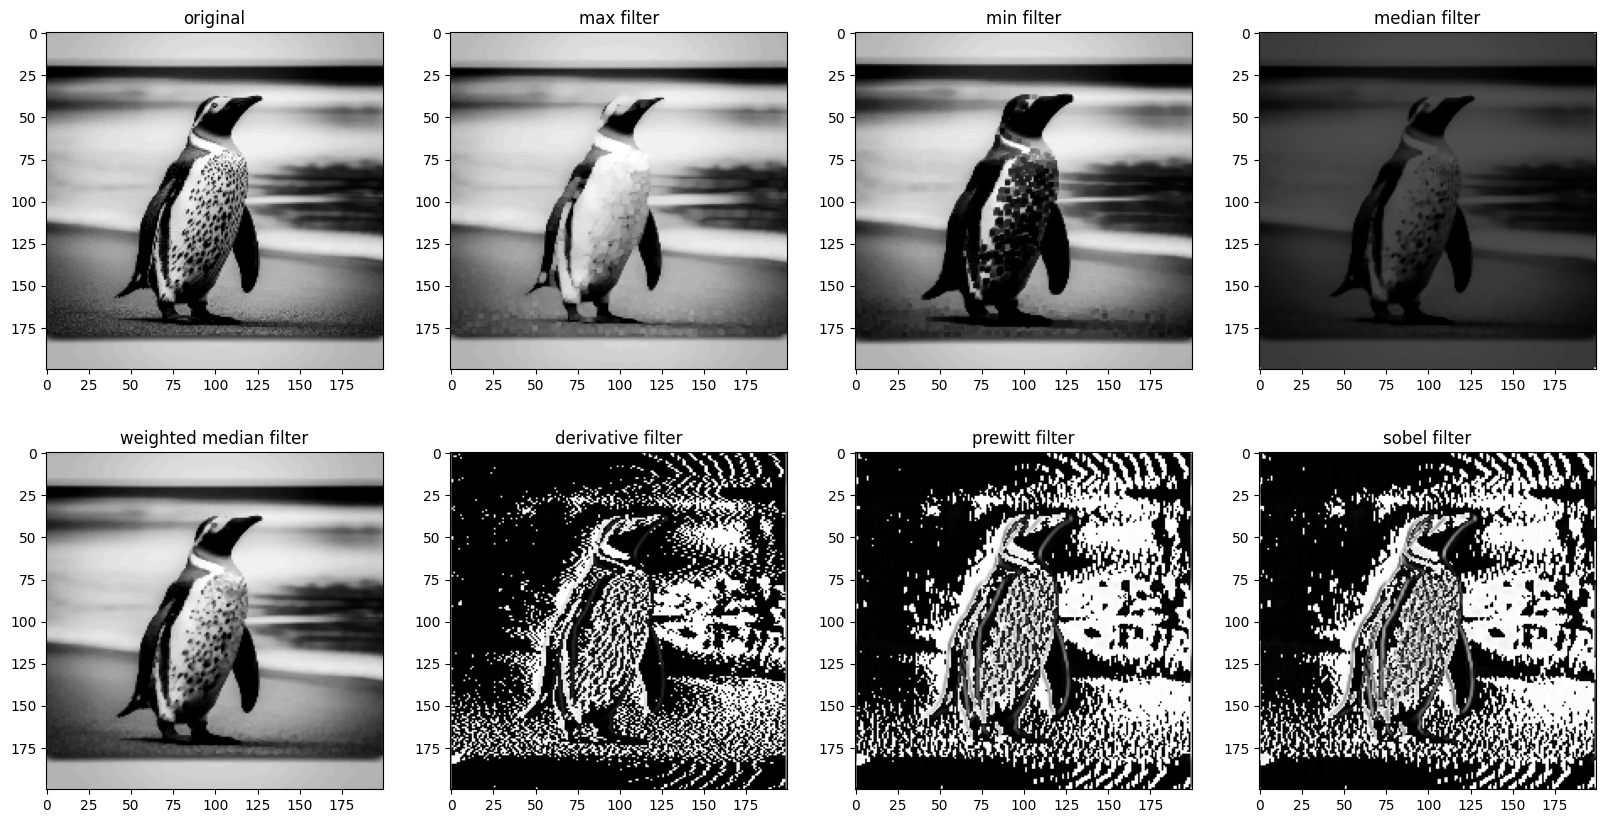

In [117]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('original')
axs[0, 1].imshow(img_max, cmap='gray')
axs[0, 1].set_title('max filter')
axs[0, 2].imshow(img_min, cmap='gray')
axs[0, 2].set_title('min filter')
axs[0, 3].imshow(img_median, cmap='gray')
axs[0, 3].set_title('median filter')
axs[1, 0].imshow(img_weighted_median, cmap='gray')
axs[1, 0].set_title('weighted median filter')
axs[1, 1].imshow(img_dev, cmap='gray')
axs[1, 1].set_title('derivative filter')
axs[1, 2].imshow(img_prewitt, cmap='gray')
axs[1, 2].set_title('prewitt filter')
axs[1, 3].imshow(img_sobel, cmap='gray')
axs[1, 3].set_title('sobel filter')
plt.show()


In [118]:
# load image
img2 = cv2.imread('penguin2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# max filter
img_max2 = max_filtered(img2, 5)
# min filter
img_min2 = min_filtered(img2, 5)
# median filter
img_median2 = median_filtered(img2, 5)
# weighted median filter
img_weighted_median2 = weighted_median_filter(img2, weight_kernel)
# derivative filter
img_dev2 = convolution(img2, dev_kernel)
# prewitt filter
img_prewitt2 = convolution(img2, prewitt_kernel)
# sobel filter
img_sobel2 = convolution(img2, sobel_kernel)

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

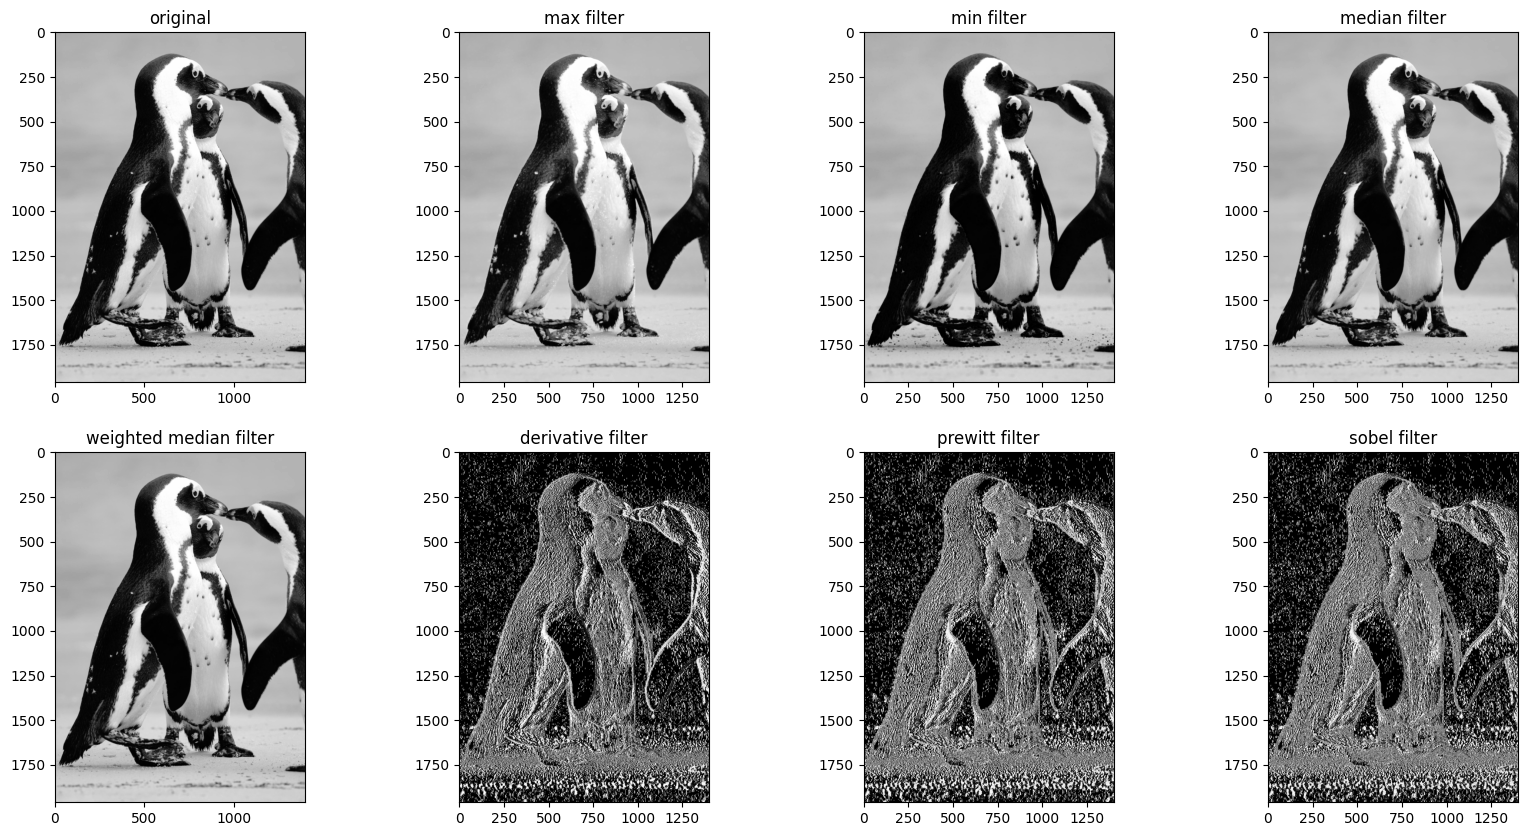

In [119]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs[0, 0].imshow(img2, cmap='gray')
axs[0, 0].set_title('original')
axs[0, 1].imshow(img_max2, cmap='gray')
axs[0, 1].set_title('max filter')
axs[0, 2].imshow(img_min2, cmap='gray')
axs[0, 2].set_title('min filter')
axs[0, 3].imshow(img_median2, cmap='gray')
axs[0, 3].set_title('median filter')
axs[1, 0].imshow(img_weighted_median2, cmap='gray')
axs[1, 0].set_title('weighted median filter')
axs[1, 1].imshow(img_dev2, cmap='gray')
axs[1, 1].set_title('derivative filter')
axs[1, 2].imshow(img_prewitt2, cmap='gray')
axs[1, 2].set_title('prewitt filter')
axs[1, 3].imshow(img_sobel2, cmap='gray')
axs[1, 3].set_title('sobel filter')
plt.show()

# Discussion 

Max filter:

The max filter outputs the maximum value of the pixels in the filter kernel. This means that it will preserve bright pixels and remove dark pixels. Max filters can be used to remove noise from images and to enhance bright features.

Min filter:

The min filter outputs the minimum value of the pixels in the filter kernel. This means that it will preserve dark pixels and remove bright pixels, which is the opposite of max filter so, Min filters can be used to remove noise from images and to enhance dark features.

Median filter:

The median filter outputs the median value of the pixels in the filter kernel. This means that it will replace each pixel with the median value of its neighbors. Median filters can be used to remove noise from images while preserving edges and other important features.

Weighted median filter:

The weighted median filter is a variant of the median filter that gives different weights to different pixels in the filter kernel. This allows the filter to be tailored to specific applications. For example, a weighted median filter can be used to remove noise from an image while preserving edges more effectively than a standard median filter.

Derivative filter:

A derivative filter is a filter that computes the derivative of an image. This means that it measures the change in intensity between adjacent pixels. Derivative filters can be used to detect edges in images.

Prewitt filter:

The Prewitt filter is a derivative filter that is used to detect edges in images. It is a 3x3 filter kernel that computes the derivative of the image in the horizontal and vertical directions. The Prewitt filter is a simple and effective edge detector, but it is more sensitive to noise than other edge detectors, such as the Sobel filter.

Sobel filter:

The Sobel filter is a derivative filter that is used to detect edges in images. It is a 3x3 filter kernel that computes the derivative of the image in the horizontal and vertical directions. The Sobel filter is more accurate than the Prewitt filter, but it is also more computationally expensive